In [8]:
import pandas as pd

iris = pd.read_csv('datasets/iris-data.csv')

iris.tail()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
145              6.7             3.0              5.2             2.3   
146              6.3             2.5              5.0             2.3   
147              6.5             3.0              5.2             2.0   
148              6.2             3.4              5.4             2.3   
149              5.9             3.0              5.1             1.8   

              class  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

In [9]:
missing = []
empty_class = []

for i in iris.columns:
    empty = iris.loc[iris[i].isnull()]
    if not empty.empty:
        missing.append(i)
        empty_class.append(iris.loc[iris[i].isnull()])

print(empty_class)

[    sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5             NaN   
8               4.4             2.9              1.4             NaN   
9               4.9             3.1              1.5             NaN   
10              5.4             3.7              1.5             NaN   
11              4.8             3.4              1.6             NaN   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa  ]


In [10]:
for i in range(len(missing)):
    clas=empty_class[i]['class'].unique()[i]
    av=(iris.loc[(iris['class']==clas,
                         missing[i])].mean())
    iris.loc[(iris['class']==clas)&
             (iris[missing[i]].isnull()),
             missing[i]]=av
    a=iris.loc[(iris['class']==clas)&
               (iris[missing[i]]==av)]
    print(a)


    sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5            0.25   
8               4.4             2.9              1.4            0.25   
9               4.9             3.1              1.5            0.25   
10              5.4             3.7              1.5            0.25   
11              4.8             3.4              1.6            0.25   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa  


In [11]:
for i in iris.columns:
    print(iris.groupby(i).count())

                 sepal_width_cm  petal_length_cm  petal_width_cm  class
sepal_length_cm                                                        
0.055                         2                2               2      2
0.057                         1                1               1      1
0.060                         1                1               1      1
0.067                         1                1               1      1
4.400                         3                3               3      3
4.500                         1                1               1      1
4.600                         4                4               4      4
4.700                         2                2               2      2
4.800                         5                5               5      5
4.900                         6                6               6      6
5.000                        10               10              10     10
5.100                         9                9               9

In [12]:
iris.loc[iris['class']=="Iris-setossa",'class']="Iris-setosa"
iris.loc[iris['class']=="versicolor",'class']="Iris-versicolor"

In [13]:
for i in iris.columns:
    print(iris.groupby(i).count())

                 sepal_width_cm  petal_length_cm  petal_width_cm  class
sepal_length_cm                                                        
0.055                         2                2               2      2
0.057                         1                1               1      1
0.060                         1                1               1      1
0.067                         1                1               1      1
4.400                         3                3               3      3
4.500                         1                1               1      1
4.600                         4                4               4      4
4.700                         2                2               2      2
4.800                         5                5               5      5
4.900                         6                6               6      6
5.000                        10               10              10     10
5.100                         9                9               9

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(iris.dropna(),hue="class")

/home/ijaju/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


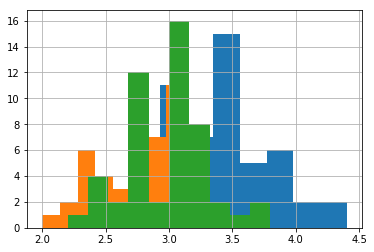

In [11]:
iris.loc[iris['class']=='Iris-setosa','sepal_width_cm'].hist()
iris.loc[iris['class']=='Iris-versicolor','sepal_width_cm'].hist()
iris.loc[iris['class']=='Iris-virginica','sepal_width_cm'].hist()

In [12]:
midwest = pd.read_csv('datasets/midwest.csv')
midwest.tail()

age  bp specific_gravity albumin sugar     rbc pus_cell pus_cell_clumps  \
395  55  80             1.02       0     0  normal   normal      notpresent   
396  42  70            1.025       0     0  normal   normal      notpresent   
397  12  80             1.02       0     0  normal   normal      notpresent   
398  17  60            1.025       0     0  normal   normal      notpresent   
399  58  80            1.025       0     0  normal   normal      notpresent   

       bacteria blood_glucose   ...   packed_cell_volume wbc_count rbc_count  \
395  notpresent           140   ...                   47      6700       4.9   
396  notpresent            75   ...                   54      7800       6.2   
397  notpresent           100   ...                   49      6600       5.4   
398  notpresent           114   ...                   51      7200       5.9   
399  notpresent           131   ...                   53      6800       6.1   

    hypertension diabetes_mellinus coronary_arterary_disease appetite  \
395           no                no                        no     good   
396           no                no                        no     good   
397           no                no                        no     good   
398           no                no                        no     good   
399           no                no                        no     good   

    pedal_edema anemia   class  
395          no     no  notckd  
396          no     no  notckd  
397          no     no  notckd  
398          no     no  notckd  
399          no     no  notckd  

[5 rows x 25 columns]

In [187]:
missing = []
empty_class = []

for i in midwest.columns:
    empty = midwest.loc[midwest[i].isnull()]
    if not empty.empty:
        missing.append(i)
        empty_class.append(midwest.loc[midwest[i].isnull()])

print(empty_class)

[     PID    county state   area  poptotal   popdensity  popwhite  popblack  \
12   573      CLAY    IL  0.028       NaN   516.428571     14403         4   
32   593  HAMILTON    IL  0.025       NaN   339.960000      8462         3   
151  712  MARSHALL    IN  0.026       NaN  1622.384620     41508        76   
160  721    ORANGE    IN  0.023       NaN   800.391304     18213       127   

     popamerindian  popasian    ...     percollege  percprof  poppovertyknown  \
12              17        29    ...      13.683010  2.788432            14248   
32              11        21    ...      14.046766  2.611367             8383   
151             72       151    ...      17.777526  5.352495            41497   
160             40        21    ...       9.788271  2.839859            18103   

     percpovertyknown  percbelowpoverty  percchildbelowpovert  \
12          98.533887         16.774284             20.582578   
32          98.635133         19.849696             21.923269   
151    

In [188]:
for i in range(len(missing)):
    for clas in empty_class[i]['state'].unique():
        av=(midwest.loc[(midwest['state']==clas,
                         missing[i])].mean())
        print(av)
        midwest.loc[(midwest['state']==clas)&
             (midwest[missing[i]].isnull()),
             missing[i]]=av
        a=midwest.loc[(midwest['state']==clas)&
               (midwest[missing[i]]==av)]
        print(a)

114076.43
    PID    county state   area   poptotal  popdensity  popwhite  popblack  \
12  573      CLAY    IL  0.028  114076.43  516.428571     14403         4   
32  593  HAMILTON    IL  0.025  114076.43  339.960000      8462         3   

    popamerindian  popasian    ...     percollege  percprof  poppovertyknown  \
12             17        29    ...      13.683010  2.788432            14248   
32             11        21    ...      14.046766  2.611367             8383   

    percpovertyknown  percbelowpoverty  percchildbelowpovert  \
12         98.533887         16.774284             20.582578   
32         98.635133         19.849696             21.923269   

    percadultpoverty  percelderlypoverty  inmetro  category  
12         14.464114           17.670078        0       LAR  
32         17.050133           23.141967        0       LHR  

[2 rows x 28 columns]
60928.53333333333
     PID    county state   area      poptotal   popdensity  popwhite  \
151  712  MARSHALL    IN 

In [189]:
for i in midwest.columns:
    print(midwest.groupby(i).count())

      county  state  area  poptotal  popdensity  popwhite  popblack  \
PID                                                                   
561        1      1     1         1           1         1         1   
562        1      1     1         1           1         1         1   
563        1      1     1         1           1         1         1   
564        1      1     1         1           1         1         1   
565        1      1     1         1           1         1         1   
566        1      1     1         1           1         1         1   
567        1      1     1         1           1         1         1   
568        1      1     1         1           1         1         1   
569        1      1     1         1           1         1         1   
570        1      1     1         1           1         1         1   
571        1      1     1         1           1         1         1   
572        1      1     1         1           1         1         1   
573   

              PID  county  state  area  poptotal  popwhite  popblack  \
popdensity                                                             
85.050000       1       1      1     1         1         1         1   
104.781818      1       1      1     1         1         1         1   
110.693333      1       1      1     1         1         1         1   
113.512821      1       1      1     1         1         1         1   
130.914894      1       1      1     1         1         1         1   
146.266667      1       1      1     1         1         1         1   
147.296296      1       1      1     1         1         1         1   
153.000000      1       1      1     1         1         1         1   
157.393258      1       1      1     1         1         1         1   
175.921569      1       1      1     1         1         1         1   
179.506329      1       1      1     1         1         1         1   
180.915254      1       1      1     1         1         1      

          PID  county  state  area  poptotal  popdensity  popwhite  popblack  \
popasian                                                                       
0           1       1      1     1         1           1         1         1   
1           1       1      1     1         1           1         1         1   
2           1       1      1     1         1           1         1         1   
3           3       3      3     3         3           3         3         3   
4           1       1      1     1         1           1         1         1   
5           2       2      2     2         2           2         2         2   
6           4       4      4     4         4           4         4         4   
7           2       2      2     2         2           2         2         2   
9           4       4      4     4         4           4         4         4   
10          4       4      4     4         4           4         4         4   
11          4       4      4     4      

               PID  county  state  area  poptotal  popdensity  popwhite  \
percamerindan                                                             
0.056232         1       1      1     1         1           1         1   
0.059537         1       1      1     1         1           1         1   
0.073062         1       1      1     1         1           1         1   
0.080078         1       1      1     1         1           1         1   
0.080355         1       1      1     1         1           1         1   
0.081931         1       1      1     1         1           1         1   
0.082740         1       1      1     1         1           1         1   
0.083899         1       1      1     1         1           1         1   
0.089871         1       1      1     1         1           1         1   
0.091655         1       1      1     1         1           1         1   
0.092182         1       1      1     1         1           1         1   
0.094432         1       

           PID  county  state  area  poptotal  popdensity  popwhite  popblack  \
perchsd                                                                         
46.912261    1       1      1     1         1           1         1         1   
56.652174    1       1      1     1         1           1         1         1   
58.385253    1       1      1     1         1           1         1         1   
58.418803    1       1      1     1         1           1         1         1   
58.695964    1       1      1     1         1           1         1         1   
59.568048    1       1      1     1         1           1         1         1   
59.726353    1       1      1     1         1           1         1         1   
59.736541    1       1      1     1         1           1         1         1   
59.779900    1       1      1     1         1           1         1         1   
59.915848    1       1      1     1         1           1         1         1   
59.992343    1       1      

                  PID  county  state  area  poptotal  popdensity  popwhite  \
percpovertyknown                                                             
80.902441           1       1      1     1         1           1         1   
81.775621           1       1      1     1         1           1         1   
82.505140           1       1      1     1         1           1         1   
85.209802           1       1      1     1         1           1         1   
85.647114           1       1      1     1         1           1         1   
85.974233           1       1      1     1         1           1         1   
86.003629           1       1      1     1         1           1         1   
87.338244           1       1      1     1         1           1         1   
87.453093           1       1      1     1         1           1         1   
87.849964           1       1      1     1         1           1         1   
88.476880           1       1      1     1         1           1

                    PID  county  state  area  poptotal  popdensity  popwhite  \
percelderlypoverty                                                             
3.547067              1       1      1     1         1           1         1   
3.838249              1       1      1     1         1           1         1   
4.085479              1       1      1     1         1           1         1   
4.280889              1       1      1     1         1           1         1   
4.906234              1       1      1     1         1           1         1   
4.974351              1       1      1     1         1           1         1   
5.064473              1       1      1     1         1           1         1   
5.403978              1       1      1     1         1           1         1   
5.450734              1       1      1     1         1           1         1   
5.682466              1       1      1     1         1           1         1   
5.878511              1       1      1  

In [190]:
midwest.loc[midwest['state']=="WN",'state']="WI"
print(midwest.iloc[:,2:])

    state   area    poptotal    popdensity  popwhite  popblack  popamerindian  \
0      IL  0.052    66090.00   1270.961540     63917      1702             98   
1      IL  0.014    10626.00    759.000000      7054      3496             19   
2      IL  0.022    14991.00    681.409091     14477       429             35   
3      IL  0.017    30806.00   1812.117650     29344       127             46   
4      IL  0.018     5836.00    324.222222      5264       547             14   
5      IL  0.050    35688.00    713.760000     35157        50             65   
6      IL  0.017     5322.00    313.058824      5298         1              8   
7      IL  0.027    16805.00    622.407407     16519       111             30   
8      IL  0.024    13437.00    559.875000     13384        16              8   
9      IL  0.058   173025.00   2983.189660    146506     16559            331   
10     IL  0.042    34418.00    819.476190     34176        82             51   
11     IL  0.030    15921.00

In [153]:
sb.pairplot(midwest.iloc[:,2:],hue='state',vars=['area','poptotal','popdensity','popwhite','popblack'])

NameError: name 'midwest' is not defined

In [94]:
import pandas as pd
ckd = pd.read_csv('datasets/chronic_kidney_disease.csv')

numericCols = [0,1,2,3,4,9,10,11,12,13,14,15,16,17]
categoricalCols = list(set(range(25)) - set(numericCols))

for i in numericCols:
    ckd[ckd.columns[i]] = pd.to_numeric(ckd[ckd.columns[i]],
                                    errors='coerce')
#for i in categoricalCols:
    #ckd[ckd.columns[i]] = ckd[ckd.columns[i]].astype('category')
ckd.dtypes

age                          float64
bp                           float64
specific_gravity             float64
albumin                      float64
sugar                        float64
rbc                           object
pus_cell                      object
pus_cell_clumps               object
bacteria                      object
blood_glucose                float64
blood_urea                   float64
sodium_creatinine            float64
sodium                       float64
potassium                    float64
hemoglobin                   float64
packed_cell_volume           float64
wbc_count                    float64
rbc_count                    float64
hypertension                  object
diabetes_mellinus             object
coronary_arterary_disease     object
appetite                      object
pedal_edema                   object
anemia                        object
class                         object
dtype: object

In [95]:
missing = []
empty_class = []

for i in ckd.columns:
    empty = ckd.loc[ckd[i].isnull()]
    if not empty.empty:
        missing.append(i)
        empty_class.append(ckd.loc[ckd[i].isnull()])

print(missing)

['age', 'bp', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose', 'blood_urea', 'sodium_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'wbc_count', 'rbc_count']


In [96]:
for i in range(len(missing)):
    for clas in empty_class[i]['class'].unique():
        av=(ckd.loc[(ckd['class']==clas,
                         missing[i])].mean())
        print(av)
        ckd.loc[(ckd['class']==clas)&
             (ckd[missing[i]].isnull()),
             missing[i]]=av
        a=ckd.loc[(ckd['class']==clas)&
               (ckd[missing[i]]==av)]
        print(a)

54.54132231404959
           age     bp  specific_gravity  albumin  sugar       rbc  pus_cell  \
30   54.541322   70.0               NaN      NaN    NaN         ?         ?   
73   54.541322  100.0             1.015      2.0    0.0  abnormal  abnormal   
112  54.541322   60.0             1.015      3.0    0.0  abnormal  abnormal   
116  54.541322   70.0             1.015      4.0    0.0  abnormal    normal   
117  54.541322   70.0             1.020      0.0    0.0         ?         ?   
169  54.541322   70.0             1.010      0.0    2.0         ?    normal   
191  54.541322   70.0             1.010      3.0    0.0    normal    normal   
203  54.541322   90.0               NaN      NaN    NaN         ?         ?   

    pus_cell_clumps    bacteria  blood_glucose  ...   packed_cell_volume  \
30       notpresent  notpresent           93.0  ...                  NaN   
73       notpresent  notpresent          129.0  ...                 14.0   
112      notpresent  notpresent           

           age       bp  specific_gravity   albumin  sugar     rbc pus_cell  \
13   68.000000   70.000          1.013918  1.722488    NaN       ?        ?   
17   47.000000   80.000          1.013918  1.722488    NaN       ?        ?   
21   60.000000   90.000          1.013918  1.722488    NaN       ?        ?   
30   54.541322   70.000          1.013918  1.722488    NaN       ?        ?   
37   72.000000   80.000          1.013918  1.722488    NaN       ?        ?   
50   53.000000   60.000          1.013918  1.722488    NaN       ?        ?   
57   76.000000   90.000          1.013918  1.722488    NaN       ?   normal   
59   59.000000  100.000          1.013918  1.722488    NaN       ?        ?   
78   70.000000   80.000          1.013918  1.722488    NaN       ?        ?   
81   45.000000   90.000          1.013918  1.722488    NaN       ?        ?   
82   38.000000   70.000          1.013918  1.722488    NaN       ?        ?   
86   56.000000   80.000          1.013918  1.722488 

           age       bp  specific_gravity   albumin    sugar       rbc  \
1     7.000000   50.000          1.020000  4.000000  0.00000         ?   
21   60.000000   90.000          1.013918  1.722488  0.76699         ?   
23   21.000000   70.000          1.010000  0.000000  0.00000         ?   
24   42.000000  100.000          1.015000  4.000000  0.00000    normal   
29   68.000000   70.000          1.005000  1.000000  0.00000  abnormal   
38   69.000000   80.000          1.020000  3.000000  0.00000  abnormal   
41   45.000000   70.000          1.010000  0.000000  0.00000         ?   
47   11.000000   80.000          1.010000  3.000000  0.00000         ?   
52   53.000000   90.000          1.015000  0.000000  0.00000         ?   
54   63.000000   80.000          1.010000  2.000000  2.00000    normal   
55   35.000000   80.000          1.005000  3.000000  0.00000  abnormal   
56   76.000000   70.000          1.015000  3.000000  4.00000    normal   
59   59.000000  100.000          1.013

           age       bp  specific_gravity   albumin    sugar       rbc  \
0    48.000000   80.000          1.020000  1.000000  0.00000         ?   
1     7.000000   50.000          1.020000  4.000000  0.00000         ?   
2    62.000000   80.000          1.010000  2.000000  3.00000    normal   
4    51.000000   80.000          1.010000  2.000000  0.00000    normal   
7    24.000000   79.625          1.015000  2.000000  4.00000    normal   
8    52.000000  100.000          1.015000  3.000000  0.00000    normal   
10   50.000000   60.000          1.010000  2.000000  4.00000         ?   
19   62.000000   60.000          1.015000  1.000000  0.00000         ?   
23   21.000000   70.000          1.010000  0.000000  0.00000         ?   
28   75.000000   70.000          1.013918  1.000000  3.00000         ?   
29   68.000000   70.000          1.005000  1.000000  0.00000  abnormal   
33   60.000000  100.000          1.020000  2.000000  0.00000  abnormal   
34   70.000000   70.000          1.010

           age       bp  specific_gravity   albumin    sugar       rbc  \
13   68.000000   70.000          1.013918  1.722488  0.76699         ?   
16   47.000000   70.000          1.015000  2.000000  0.00000         ?   
17   47.000000   80.000          1.013918  1.722488  0.76699         ?   
23   21.000000   70.000          1.010000  0.000000  0.00000         ?   
28   75.000000   70.000          1.013918  1.000000  3.00000         ?   
30   54.541322   70.000          1.013918  1.722488  0.76699         ?   
34   70.000000   70.000          1.010000  1.000000  0.00000    normal   
38   69.000000   80.000          1.020000  3.000000  0.00000  abnormal   
41   45.000000   70.000          1.010000  0.000000  0.00000         ?   
45   54.000000   80.000          1.020000  3.000000  0.00000         ?   
57   76.000000   90.000          1.013918  1.722488  0.76699         ?   
59   59.000000  100.000          1.013918  1.722488  0.76699         ?   
60   67.000000   90.000          1.020

      age    bp  specific_gravity  albumin  sugar     rbc pus_cell  \
273  47.0  80.0             1.020      0.0    0.0  normal   normal   
274  19.0  80.0             1.020      0.0    0.0  normal   normal   
287  39.0  70.0             1.025      0.0    0.0  normal   normal   
302  29.0  70.0             1.020      0.0    0.0  normal   normal   
319  30.0  60.0             1.020      0.0    0.0  normal   normal   
324  40.0  80.0             1.020      0.0    0.0  normal   normal   
330  43.0  80.0             1.020      0.0    0.0  normal   normal   

    pus_cell_clumps    bacteria  blood_glucose   ...    packed_cell_volume  \
273      notpresent  notpresent           95.0   ...             46.335616   
274      notpresent  notpresent          107.0   ...             44.000000   
287      notpresent  notpresent          124.0   ...             43.000000   
302      notpresent  notpresent          127.0   ...             48.000000   
319      notpresent  notpresent          138.0   

In [97]:
missing = []
empty_class = []

for i in categoricalCols:
    empty = ckd.loc[ckd[ckd.columns[i]]=='?']
    if not empty.empty:
        missing.append(ckd.columns[i])
        empty_class.append(ckd.loc[ckd[ckd.columns[i]]=='?'])

from scipy.stats import mode

print(mode(ckd.loc[(ckd['class']==empty_class[0]['class'].unique()[0]) & 
               (ckd[missing[0]] != '?'),
             missing[0]])[0][0])

normal


In [99]:
from scipy.stats import mode

for i in range(len(missing)):
    for clas in empty_class[i]['class'].unique():
        av=mode(ckd.loc[(ckd['class']==clas) & 
               (ckd[missing[i]] != '?'),
             missing[i]])[0][0]
        print(av,clas)
        ckd.loc[(ckd['class']==clas)&
             (ckd[missing[i]]=='?'),
             missing[i]]=av
        a=ckd.loc[(ckd['class']==clas)&
               (ckd[missing[i]]==av)]
        print(a)

('normal', 'ckd')
           age       bp  specific_gravity   albumin    sugar     rbc  \
0    48.000000   80.000          1.020000  1.000000  0.00000  normal   
1     7.000000   50.000          1.020000  4.000000  0.00000  normal   
2    62.000000   80.000          1.010000  2.000000  3.00000  normal   
3    48.000000   70.000          1.005000  4.000000  0.00000  normal   
4    51.000000   80.000          1.010000  2.000000  0.00000  normal   
5    60.000000   90.000          1.015000  3.000000  0.00000  normal   
6    68.000000   70.000          1.010000  0.000000  0.00000  normal   
7    24.000000   79.625          1.015000  2.000000  4.00000  normal   
8    52.000000  100.000          1.015000  3.000000  0.00000  normal   
10   50.000000   60.000          1.010000  2.000000  4.00000  normal   
12   68.000000   70.000          1.015000  3.000000  1.00000  normal   
13   68.000000   70.000          1.013918  1.722488  0.76699  normal   
14   68.000000   80.000          1.010000  3.0

           age     bp  specific_gravity   albumin    sugar       rbc pus_cell  \
0    48.000000   80.0          1.020000  1.000000  0.00000    normal   normal   
1     7.000000   50.0          1.020000  4.000000  0.00000    normal   normal   
2    62.000000   80.0          1.010000  2.000000  3.00000    normal   normal   
4    51.000000   80.0          1.010000  2.000000  0.00000    normal   normal   
5    60.000000   90.0          1.015000  3.000000  0.00000    normal   normal   
6    68.000000   70.0          1.010000  0.000000  0.00000    normal   normal   
12   68.000000   70.0          1.015000  3.000000  1.00000    normal   normal   
13   68.000000   70.0          1.013918  1.722488  0.76699    normal   normal   
15   40.000000   80.0          1.015000  3.000000  0.00000    normal   normal   
16   47.000000   70.0          1.015000  2.000000  0.00000    normal   normal   
17   47.000000   80.0          1.013918  1.722488  0.76699    normal   normal   
18   60.000000  100.0       

('notpresent', 'notckd')
           age    bp  specific_gravity  albumin  sugar     rbc pus_cell  \
250  40.000000  80.0          1.025000      0.0    0.0  normal   normal   
251  23.000000  80.0          1.025000      0.0    0.0  normal   normal   
252  45.000000  80.0          1.025000      0.0    0.0  normal   normal   
253  57.000000  80.0          1.025000      0.0    0.0  normal   normal   
254  51.000000  60.0          1.025000      0.0    0.0  normal   normal   
255  34.000000  80.0          1.025000      0.0    0.0  normal   normal   
256  60.000000  80.0          1.025000      0.0    0.0  normal   normal   
257  38.000000  60.0          1.020000      0.0    0.0  normal   normal   
258  42.000000  80.0          1.020000      0.0    0.0  normal   normal   
259  35.000000  80.0          1.020000      0.0    0.0  normal   normal   
260  30.000000  80.0          1.020000      0.0    0.0  normal   normal   
261  49.000000  80.0          1.020000      0.0    0.0  normal   normal   


           age    bp  specific_gravity  albumin  sugar     rbc pus_cell  \
250  40.000000  80.0          1.025000      0.0    0.0  normal   normal   
251  23.000000  80.0          1.025000      0.0    0.0  normal   normal   
252  45.000000  80.0          1.025000      0.0    0.0  normal   normal   
253  57.000000  80.0          1.025000      0.0    0.0  normal   normal   
254  51.000000  60.0          1.025000      0.0    0.0  normal   normal   
255  34.000000  80.0          1.025000      0.0    0.0  normal   normal   
256  60.000000  80.0          1.025000      0.0    0.0  normal   normal   
257  38.000000  60.0          1.020000      0.0    0.0  normal   normal   
258  42.000000  80.0          1.020000      0.0    0.0  normal   normal   
259  35.000000  80.0          1.020000      0.0    0.0  normal   normal   
260  30.000000  80.0          1.020000      0.0    0.0  normal   normal   
261  49.000000  80.0          1.020000      0.0    0.0  normal   normal   
262  55.000000  80.0     

('no', 'notckd')
           age    bp  specific_gravity  albumin  sugar     rbc pus_cell  \
250  40.000000  80.0          1.025000      0.0    0.0  normal   normal   
251  23.000000  80.0          1.025000      0.0    0.0  normal   normal   
252  45.000000  80.0          1.025000      0.0    0.0  normal   normal   
253  57.000000  80.0          1.025000      0.0    0.0  normal   normal   
254  51.000000  60.0          1.025000      0.0    0.0  normal   normal   
255  34.000000  80.0          1.025000      0.0    0.0  normal   normal   
256  60.000000  80.0          1.025000      0.0    0.0  normal   normal   
257  38.000000  60.0          1.020000      0.0    0.0  normal   normal   
258  42.000000  80.0          1.020000      0.0    0.0  normal   normal   
259  35.000000  80.0          1.020000      0.0    0.0  normal   normal   
260  30.000000  80.0          1.020000      0.0    0.0  normal   normal   
261  49.000000  80.0          1.020000      0.0    0.0  normal   normal   
262  55.

In [100]:
for i in categoricalCols:
    ckd[ckd.columns[i]] = ckd[ckd.columns[i]].astype('category')
print(ckd.dtypes)

age                           float64
bp                            float64
specific_gravity              float64
albumin                       float64
sugar                         float64
rbc                          category
pus_cell                     category
pus_cell_clumps              category
bacteria                     category
blood_glucose                 float64
blood_urea                    float64
sodium_creatinine             float64
sodium                        float64
potassium                     float64
hemoglobin                    float64
packed_cell_volume            float64
wbc_count                     float64
rbc_count                     float64
hypertension                 category
diabetes_mellinus            category
coronary_arterary_disease    category
appetite                     category
pedal_edema                  category
anemia                       category
class                        category
dtype: object


In [101]:
print(ckd['diabetes_mellinus'].unique())
ckd.loc[ckd['diabetes_mellinus']==" yes",'diabetes_mellinus']="yes"
print(ckd['diabetes_mellinus'].unique())

[yes, no, yes]
Categories (3, object): [yes, no, yes]
[yes, no]
Categories (2, object): [yes, no]


In [108]:
ckd['class'].unique()

[ckd, notckd]
Categories (2, object): [ckd, notckd]

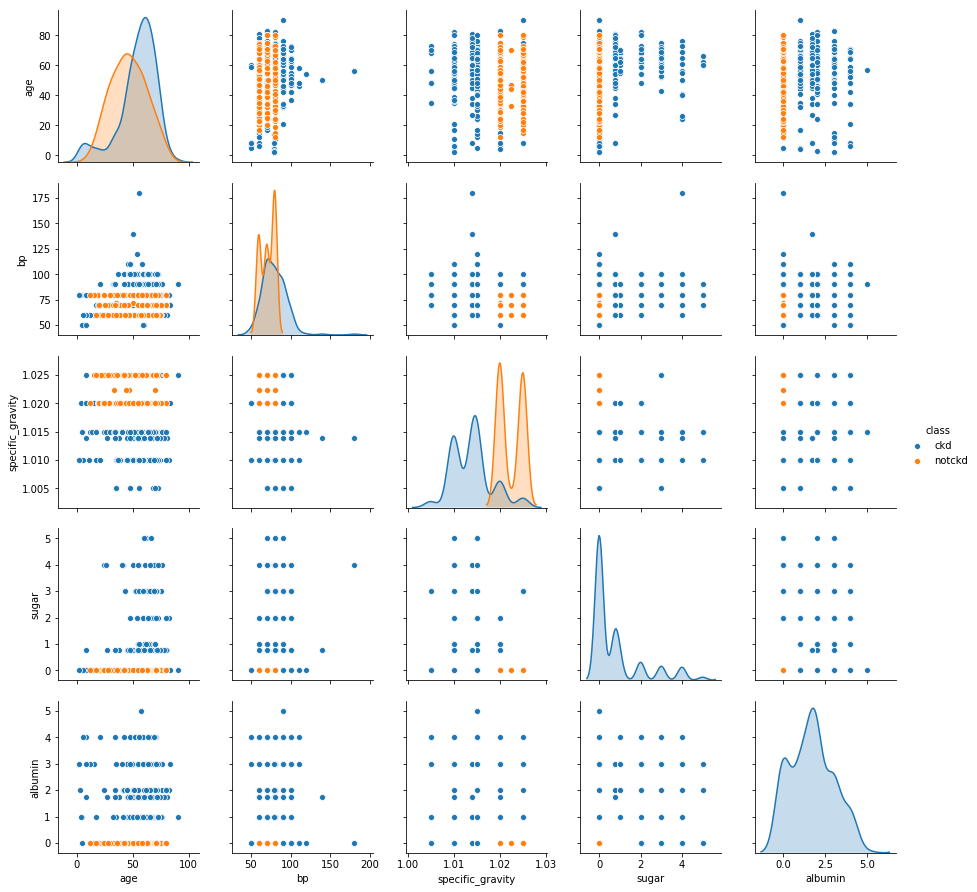

In [119]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(ckd.dropna(),hue="class",vars=['age','bp','specific_gravity','sugar','albumin'])

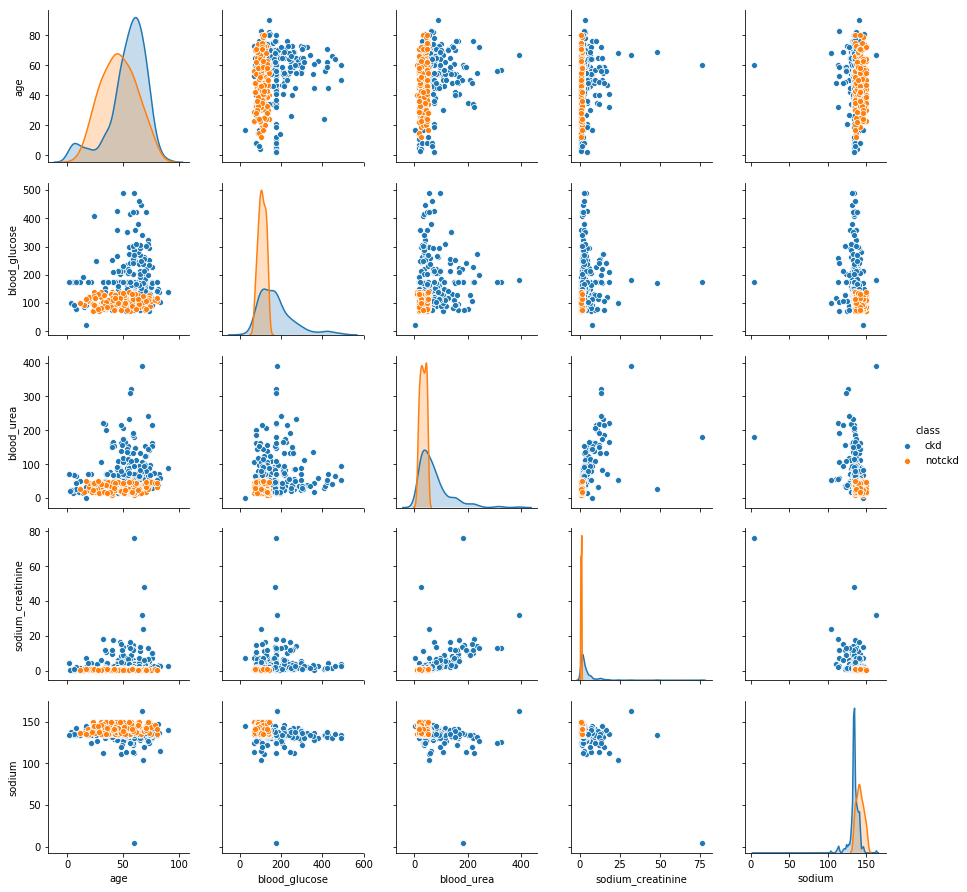

In [120]:
sb.pairplot(ckd.dropna(),hue="class",vars=['age','blood_glucose','blood_urea','sodium_creatinine','sodium'])

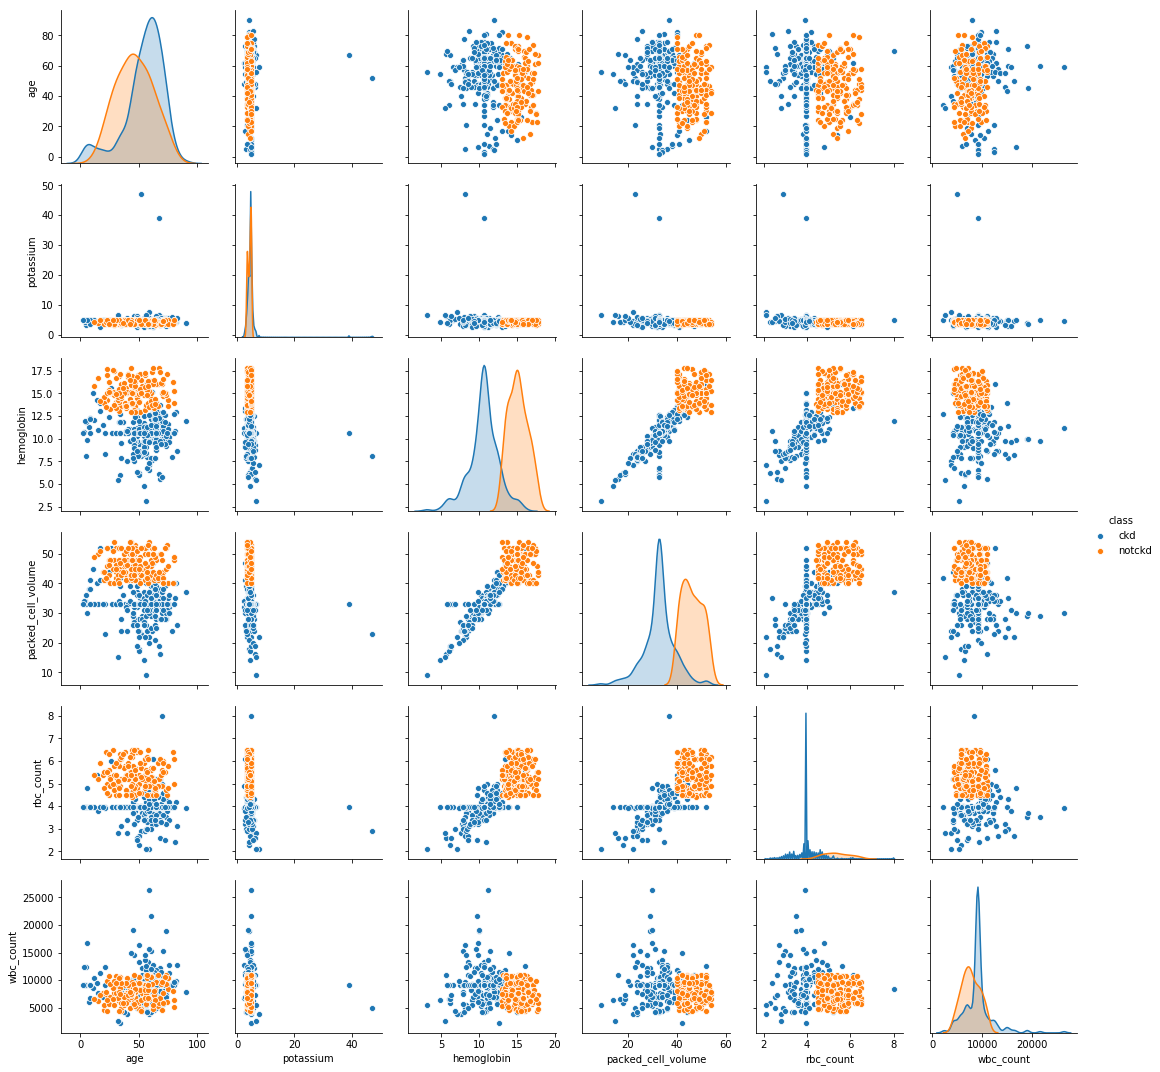

In [122]:
sb.pairplot(ckd.dropna(),hue="class",vars=['age','potassium','hemoglobin','packed_cell_volume','rbc_count','wbc_count'])

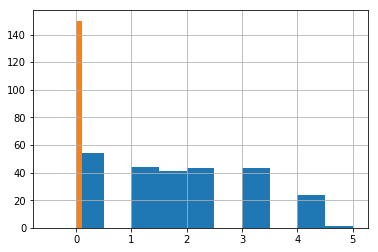

In [124]:
ckd.loc[ckd['class']=='ckd','albumin'].hist()
ckd.loc[ckd['class']=='notckd','albumin'].hist()

In [148]:
ckd.iloc[1:,:].to_csv("ckd.csv", sep=',')

In [150]:
pd.read_csv("/home/ijaju/Documents/datasets/chronic_kidney_disease.csv")

age       bp  specific_gravity   albumin    sugar       rbc  \
0     7.000000   50.000          1.020000  4.000000  0.00000    normal   
1    62.000000   80.000          1.010000  2.000000  3.00000    normal   
2    48.000000   70.000          1.005000  4.000000  0.00000    normal   
3    51.000000   80.000          1.010000  2.000000  0.00000    normal   
4    60.000000   90.000          1.015000  3.000000  0.00000    normal   
5    68.000000   70.000          1.010000  0.000000  0.00000    normal   
6    24.000000   79.625          1.015000  2.000000  4.00000    normal   
7    52.000000  100.000          1.015000  3.000000  0.00000    normal   
8    53.000000   90.000          1.020000  2.000000  0.00000  abnormal   
9    50.000000   60.000          1.010000  2.000000  4.00000    normal   
10   63.000000   70.000          1.010000  3.000000  0.00000  abnormal   
11   68.000000   70.000          1.015000  3.000000  1.00000    normal   
12   68.000000   70.000          1.013918  1.722488  0.76699    normal   
13   68.000000   80.000          1.010000  3.000000  2.00000    normal   
14   40.000000   80.000          1.015000  3.000000  0.00000    normal   
15   47.000000   70.000          1.015000  2.000000  0.00000    normal   
16   47.000000   80.000          1.013918  1.722488  0.76699    normal   
17   60.000000  100.000          1.025000  0.000000  3.00000    normal   
18   62.000000   60.000          1.015000  1.000000  0.00000    normal   
19   61.000000   80.000          1.015000  2.000000  0.00000  abnormal   
20   60.000000   90.000          1.013918  1.722488  0.76699    normal   
21   48.000000   80.000          1.025000  4.000000  0.00000    normal   
22   21.000000   70.000          1.010000  0.000000  0.00000    normal   
23   42.000000  100.000          1.015000  4.000000  0.00000    normal   
24   61.000000   60.000          1.025000  0.000000  0.00000    normal   
25   75.000000   80.000          1.015000  0.000000  0.00000    normal   
26   69.000000   70.000          1.010000  3.000000  4.00000    normal   
27   75.000000   70.000          1.013918  1.000000  3.00000    normal   
28   68.000000   70.000          1.005000  1.000000  0.00000  abnormal   
29   54.541322   70.000          1.013918  1.722488  0.76699    normal   
..         ...      ...               ...       ...      ...       ...   
369  69.000000   70.000          1.020000  0.000000  0.00000    normal   
370  28.000000   60.000          1.025000  0.000000  0.00000    normal   
371  72.000000   60.000          1.020000  0.000000  0.00000    normal   
372  61.000000   70.000          1.025000  0.000000  0.00000    normal   
373  79.000000   80.000          1.025000  0.000000  0.00000    normal   
374  70.000000   80.000          1.020000  0.000000  0.00000    normal   
375  58.000000   70.000          1.025000  0.000000  0.00000    normal   
376  64.000000   70.000          1.020000  0.000000  0.00000    normal   
377  71.000000   60.000          1.025000  0.000000  0.00000    normal   
378  62.000000   80.000          1.025000  0.000000  0.00000    normal   
379  59.000000   60.000          1.020000  0.000000  0.00000    normal   
380  71.000000   70.000          1.025000  0.000000  0.00000    normal   
381  48.000000   80.000          1.025000  0.000000  0.00000    normal   
382  80.000000   80.000          1.025000  0.000000  0.00000    normal   
383  57.000000   60.000          1.020000  0.000000  0.00000    normal   
384  63.000000   70.000          1.020000  0.000000  0.00000    normal   
385  46.000000   70.000          1.025000  0.000000  0.00000    normal   
386  15.000000   80.000          1.025000  0.000000  0.00000    normal   
387  51.000000   80.000          1.020000  0.000000  0.00000    normal   
388  41.000000   80.000          1.025000  0.000000  0.00000    normal   
389  52.000000   80.000          1.025000  0.000000  0.00000    normal   
390  36.000000   80.000          1.025000  0.000000  0.00000    normal   
391  57.000000 

In [174]:
import numpy as np
from sklearn import preprocessing
header = ['age','bp','sg','al','su','rbc','pc','pcc',
    'ba','bgr','bu','sc','sod','pot','hemo','pcv',
    'wbcc','rbcc','htn','dm','cad','appet','pe','ane',
    'classification']
df = pd.read_csv("/home/ijaju/Documents/datasets/chronic_kidney_disease(raw).csv",
        header=None,
        names=header)

df = df.replace('?', np.nan)
df = df.dropna()
targets = df['classification'].astype('category')
categorical_ = ['rbc', 'pc', 'pcc', 'ba', 'htn',
        'dm', 'cad', 'appet', 'pe', 'ane']

numericCols = [0,1,2,3,4,9,10,11,12,13,14,15,16,17]
categoricalCols = list(set(range(25)) - set(numericCols))

for i in numericCols:
    df[df.columns[i]] = pd.to_numeric(df[df.columns[i]],
                                    errors='coerce')
for i in categoricalCols:
    df[df.columns[i]] = df[df.columns[i]].astype('category')

df.dtypes

age                  int64
bp                   int64
sg                 float64
al                   int64
su                   int64
rbc               category
pc                category
pcc               category
ba                category
bgr                  int64
bu                   int64
sc                 float64
sod                  int64
pot                float64
hemo               float64
pcv                  int64
wbcc                 int64
rbcc               float64
htn               category
dm                category
cad               category
appet             category
pe                category
ane               category
classification    category
dtype: object

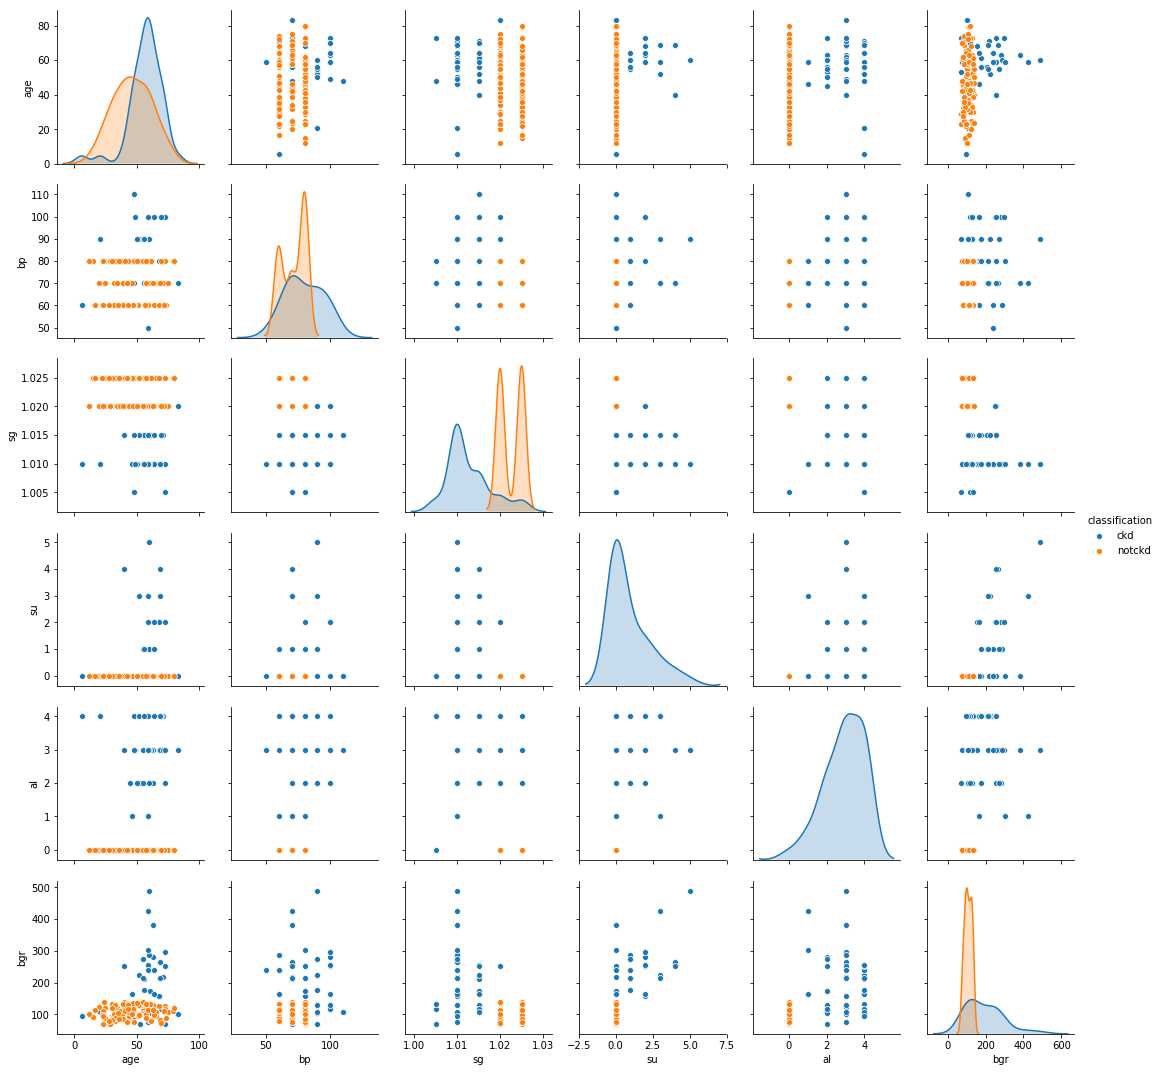

In [176]:
sb.pairplot(df.dropna(),hue="classification",vars=['age','bp','sg','su','al'])

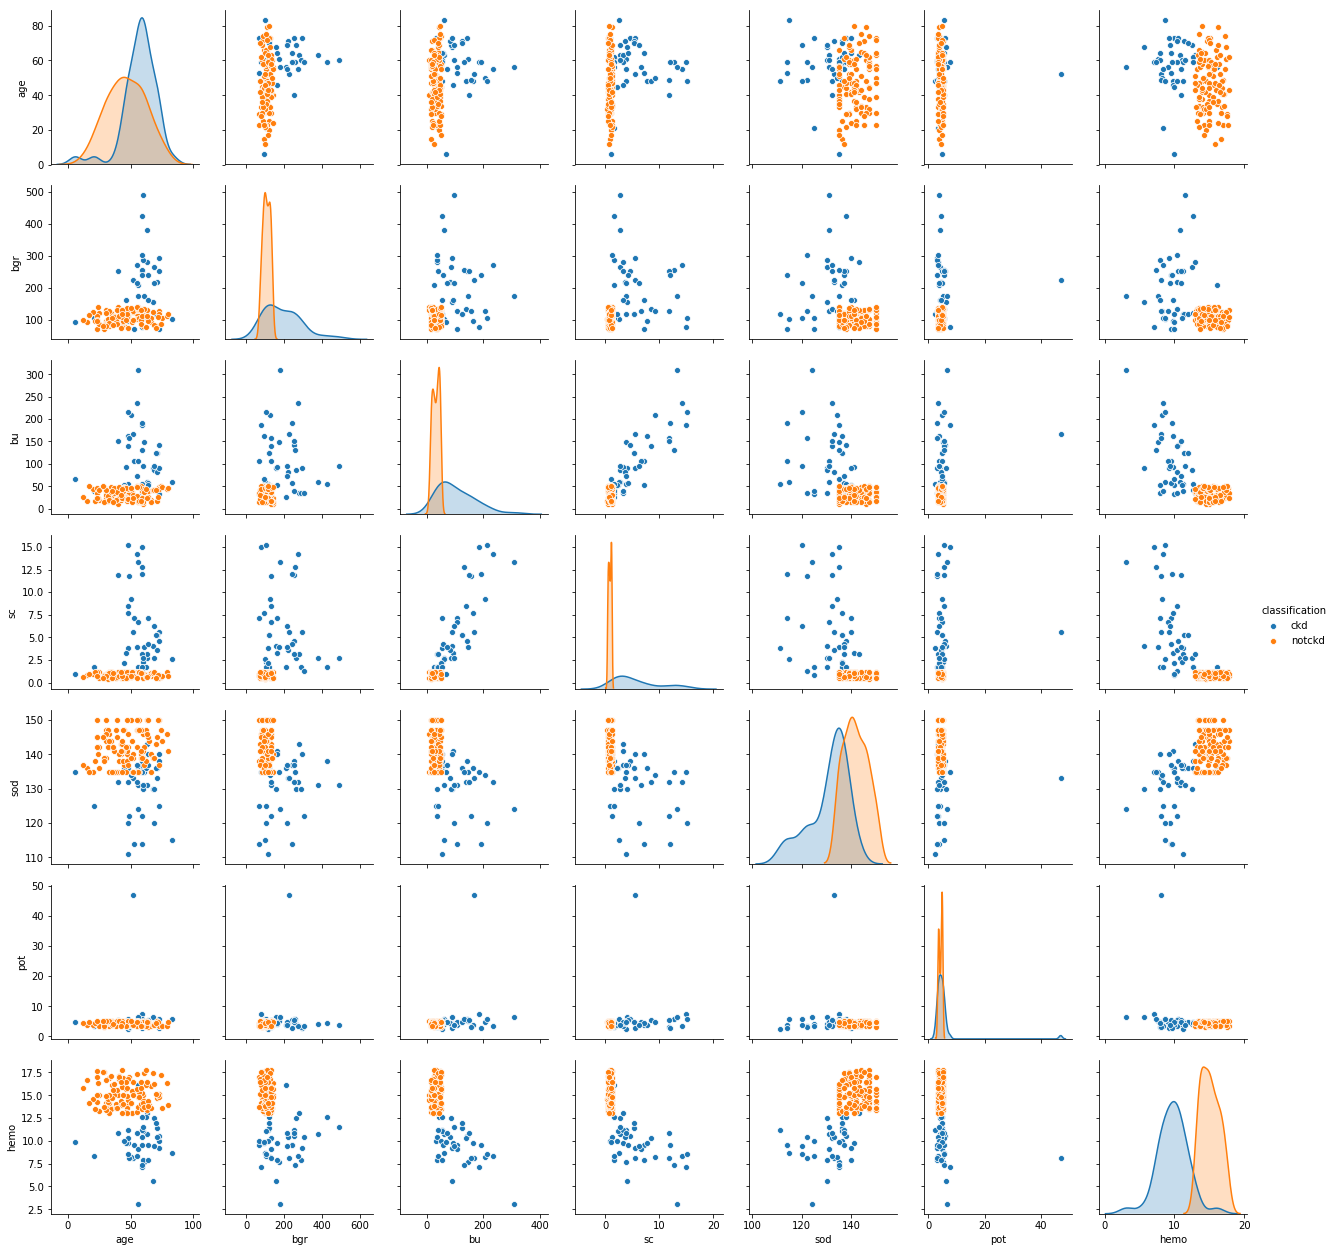

In [177]:
sb.pairplot(df.dropna(),hue="classification",vars=['age','bgr','bu','sc','sod','pot','hemo'])

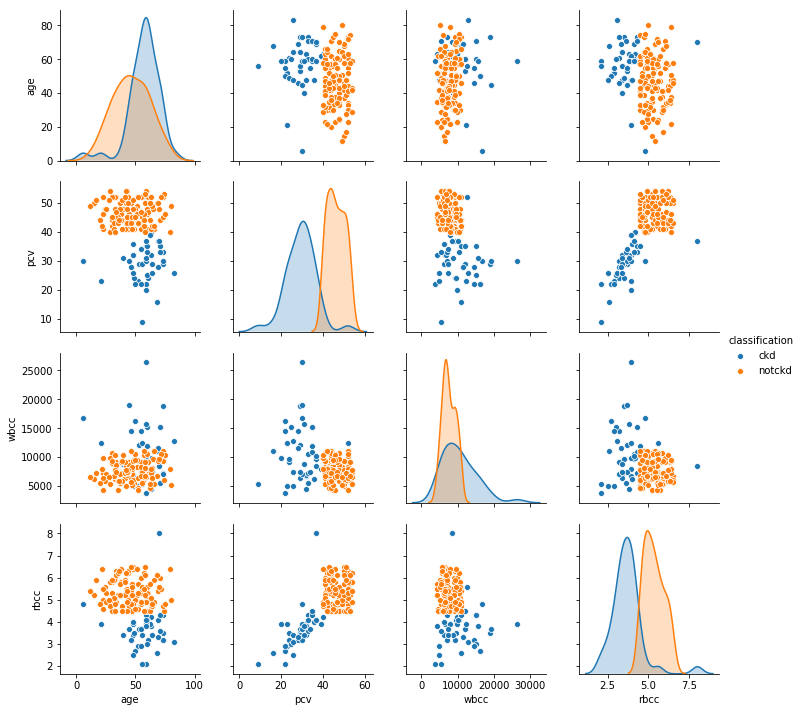

In [178]:
sb.pairplot(df.dropna(),hue="classification",vars=['age','pcv','wbcc','rbcc'])